# Chapter 4 – Training Linear Models

In [1]:
import sklearn
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

## Linear Regression with Normal Equation

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

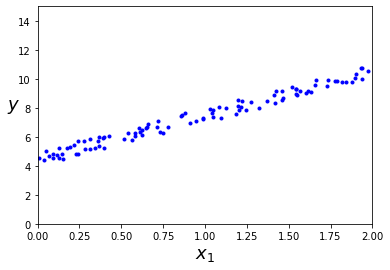

In [3]:
plt.plot(X, y, "b.") # we need the dots
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

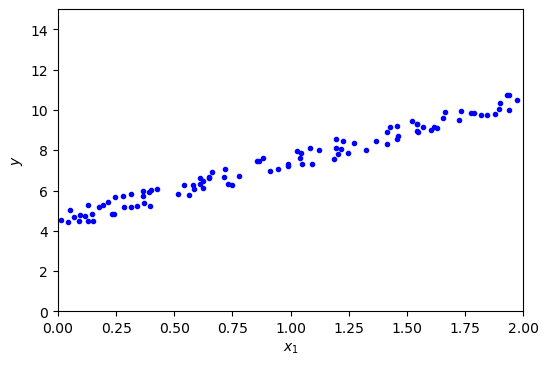

In [4]:
# xb
_, ax = plt.subplots(figsize=(6, 4), dpi=100)


ax.plot(X, y, "b.")
ax.axis([0, 2, 0, 15])
ax.set(xlabel="$x_1$", ylabel="$y$")
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)),X]#add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # try more

In [6]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]   # add x0 = 1 to each instance

In [8]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

(0.0, 2.0, 0.0, 15.0)

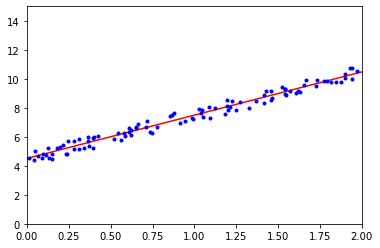

In [9]:
plt.plot(X_new,y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

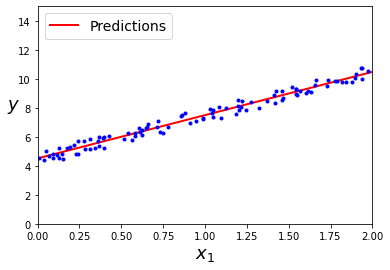

In [10]:
plt.plot(X_new, y_predict,"r-", linewidth=2,label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

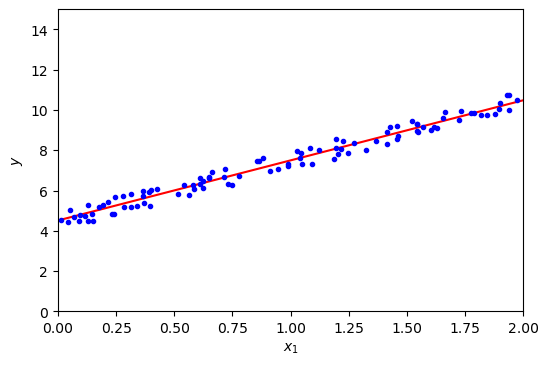

In [11]:
#xb
_,ax = plt.subplots(figsize=(6,4),dpi=100)

ax.plot(X_new, y_predict,"r-")
ax.plot(X,y,"b.")
ax.set(xlabel="$x_1$",ylabel="$y$")
ax.axis([0, 2, 0, 15])
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_, theta_best

(array([4.51359766]),
 array([[2.98323418]]),
 array([[4.51359766],
        [2.98323418]]))

In [14]:
lin_reg.predict(X_new), y_predict

(array([[ 4.51359766],
        [10.48006601]]),
 array([[ 4.51359766],
        [10.48006601]]))

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

## Linear regression using batch gradient descent

In [17]:
eta = 0.1 # learning rate
n_iterations = 1000
m =100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[4.51359766],
       [2.98323418]])

In [19]:
X_new_b.dot(theta)

array([[ 4.51359766],
       [10.48006601]])

In [20]:
# Batch Gradient Descent by xb
theta_path_bgd = []
m = len(X_b)

def plot_gradient_descent(theta, eta, ax, theta_path=None):
    ax.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            ax.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= eta * gradients
        # equals to : theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    ax.axis([0, 2, 0, 15])
    ax.set(xlabel="$x_1$",
           title=f"$\eta = {eta}$")

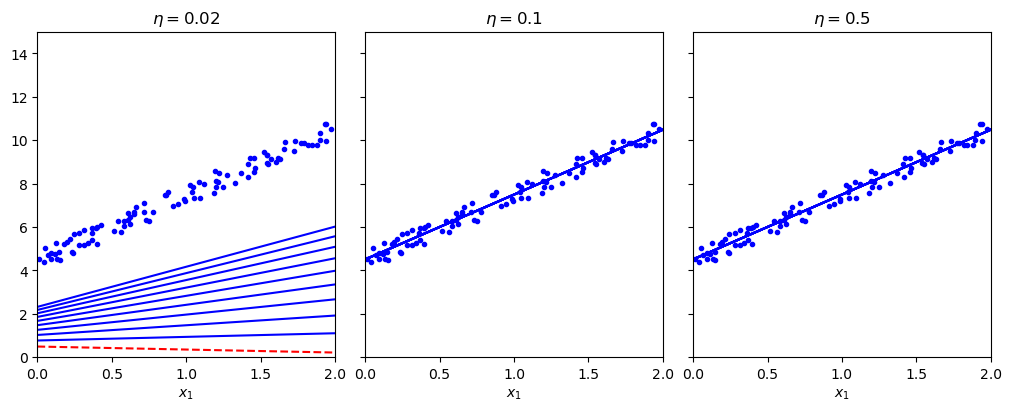

In [21]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

_, axes = plt.subplots(1,3,figsize=(10, 4),dpi=100,
                     sharey=True,constrained_layout=True)

etas = [.02, .1, .5]
theta_paths = [None, theta_path_bgd, None]

for ax, eta, theta_path in zip(axes.flatten(), etas, theta_paths):
    plot_gradient_descent(theta, eta=eta, ax=ax, theta_path=theta_path)

plt.show()

In [22]:
# try

In [23]:
len(X_b)

100

In [24]:
theta_path_bgd = []
n_iterations = 1000
m = len(X_b)
eta = (0.02,0.1,0.3,0.5)

for iteration in range(n_iterations):
    if iteration < 10:
        y_predict = X_new_b.dot(theta)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta =  theta - eta * gradients

In [25]:
theta

array([[4.51359766, 4.51359766, 4.51359766, 4.51359766],
       [2.98323418, 2.98323418, 2.98323418, 2.98323418]])

## Stochastic Gradient Descent

$Stochastic\ Gradient\ Descent$ picks a random instance in the training set at every step and computes the gradients based only on that single instance.

In [26]:
np.random.seed(42)

theta_path_sgd = []
m = len(X_b)
random_index = np.random.randint(m)
theta = np.random.randn(2, 1)  # random initialization

In [27]:
n_epochs = 50
t_0, t_1 = 5, 50 # learning schedule hyperparameters

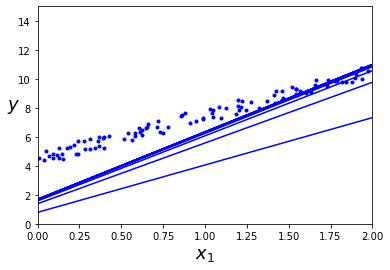

In [28]:
def learning_schedule(t):
    return t_0 / (t + t_1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        x_i = X_b[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

        
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

In [29]:
theta

array([[1.68181717],
       [4.64987512]])

In [30]:
from sklearn.linear_model import SGDRegressor

In [31]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,
                       penalty=None, eta0=0.1, 
                       random_state=42)
sgd_reg.fit(X, y .ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [32]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.51603434]), array([3.00059188]))

## Mini-batch gradient descent

In [33]:
theta_path_mgd = []
# m = len(X_b)
n_iterations = 50
minibathch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization
shuffled_indices = np.random.permutation(m)

# theta
# shuffled_indices

In [34]:
t_0, t_1 = 200, 1000


def learning_schedule(m):
    return t_0 / (t + t_1)


t = 0
for epoch in range(n_iterations):
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibathch_size):
        t += 1
        x_i = X_b_shuffled[i : i + minibathch_size]
        y_i = y_shuffled[i : i + minibathch_size]
        gradients = 2 / minibathch_size * x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_schedule(t)
        theta_path_mgd.append(theta)

In [35]:
theta

array([[ 0.49671415],
       [-0.1382643 ]])

In [40]:
# theta_path_mgd

In [37]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [41]:
# theta_path_mgd[:, 0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

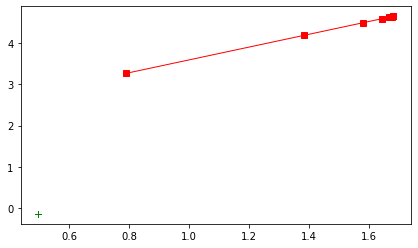

In [42]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [ ]:
theta_path_sgd.shape

In [ ]:
theta_path_mgd.shape

In [ ]:
theta_path_bgd.shape

In [ ]:
_, ax = plt.subplots(figsize=(7,4),dpi=80)

plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,label="Stochastic")

## Polynomial Regression

In [43]:
import numpy.random as rnd

In [44]:
m = 100
X = 6 * rnd.rand(m,1) -3
y = 0.5 * X ** 2 + X + 2 + rnd.randn(m,1)

Text(0.5, 1.0, 'quadratic data plot')

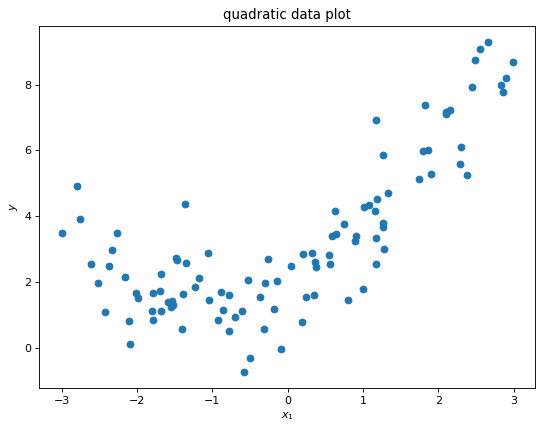

In [45]:
_,ax = plt.subplots(figsize=(8,6),dpi=80)
ax.scatter(X,y)
ax.set(xlabel="$x_1$",ylabel="$y$")
ax.set_title("quadratic data plot")

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [48]:
X_poly = poly_features.fit_transform(X)

In [49]:
X_poly[0]

array([-1.80694558,  3.26505231])

In [50]:
lin_reg = LinearRegression()

In [51]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [52]:
lin_reg.intercept_,lin_reg.coef_

(array([1.95257495]), array([[1.02476759, 0.50417279]]))

In [53]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

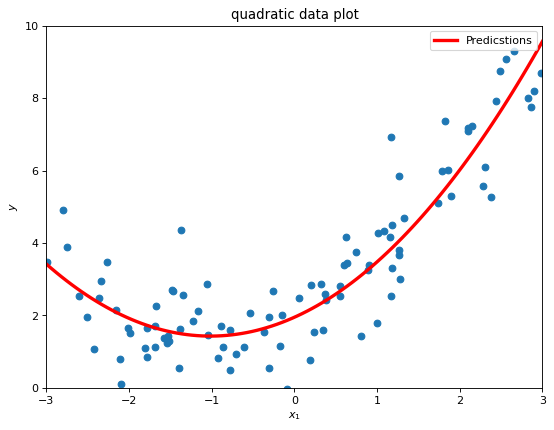

In [54]:
_,ax = plt.subplots(figsize=(8,6),dpi=80)
ax.scatter(X,y)
ax.plot(X_new,y_new,"r-",linewidth=3,label="Predicstions")
ax.set(xlabel="$x_1$",ylabel="$y$")
plt.legend()
ax.set_title("quadratic data plot")
plt.axis([-3, 3, 0, 10])
plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Text(0.5, 1.0, 'High degree Polynomianls Plot')

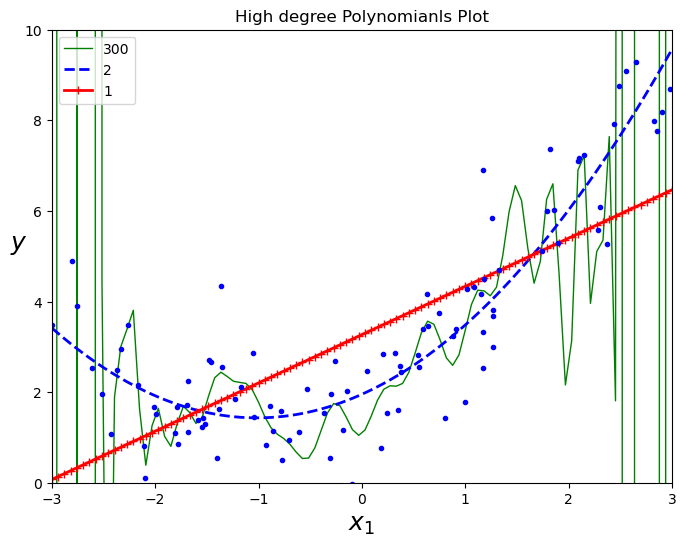

In [56]:
std_scaler = StandardScaler()
lin_reg = LinearRegression()
plt.figure(figsize=(8,6),dpi=100)
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    polynomial_regression = Pipeline([("poly_features", polybig_features),
                                      ("std_scaler", std_scaler),
                                      ("lin_reg", lin_reg)])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("High degree Polynomianls Plot")

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
    